<a href="https://colab.research.google.com/github/ajheller/notebooks/blob/master/Copy_of_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Due the day/time of the final.

Interactive grading will be June 8th through 15th (by either aron or Michael.)



Submit answers in a copy of this notebook.

# 1. Ch. 7 Polynomial Transform LM question:

Ch. 7 Polynomial Transform LM question:

Plot the polynomial fit on the Pima dataset (included in HW2 folder) for degree 1 through 7 against the scatter plot of the data. Also note the change in the proportion of explained variance due to X, analyze (eg. bias/variance), and choose the appropriate degree fit.


In [0]:
# import drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# pima.csv is from https://www.kaggle.com/uciml/pima-indians-diabetes-database
# last column is "Outcome", which I assume is the y, other cols are X
# Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

import pandas as pd
import numpy as np
### INSERT YOUR PATH to data HERE: ###
my_path = '/content/drive/My Drive/ecs171_yancey/Homework/Homework2_Ch7,9,NN/pima.csv'
pima = pd.read_csv(my_path, header=None)  # there is no header line in this file
pima

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [0]:
# split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = \
  train_test_split(pima.iloc[:, 0:8],
                   pd.DataFrame(pima.iloc[:,8]), 
                   test_size=100)

In [0]:
# fit a kNN model for comparison
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train )

# get kNN predictions
knnpreds = knn.predict(X_test)


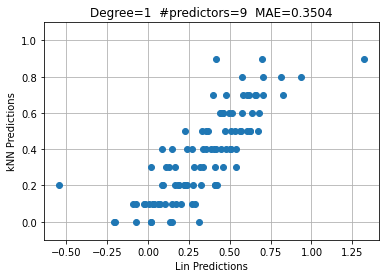

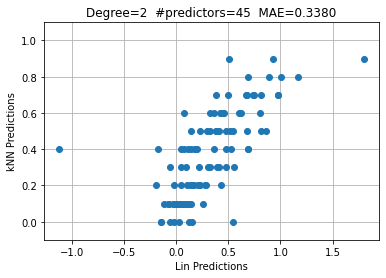

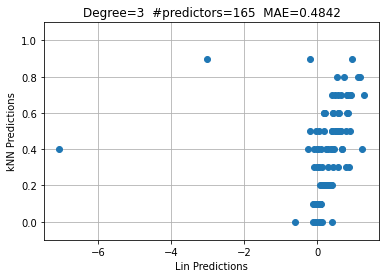

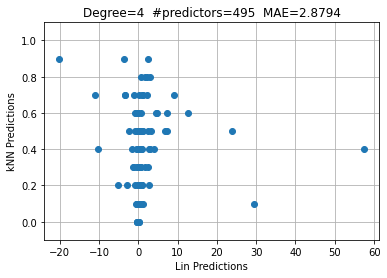

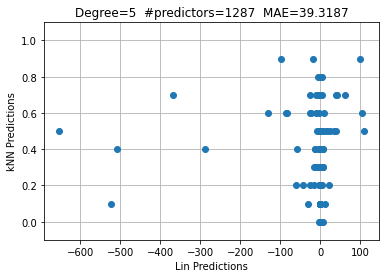

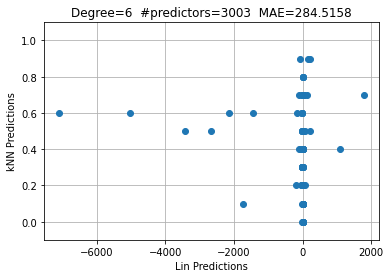

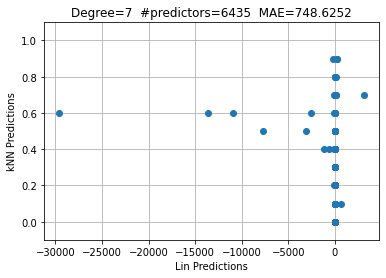

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

for degree in range(1,8):
  poly_reg = PolynomialFeatures(degree=degree)
  X_poly = poly_reg.fit_transform(X_train.values)
  pol_reg = LinearRegression()
  pol_reg.fit(X_poly, y_train.values)

  preds = pol_reg.predict(poly_reg.fit_transform(pd.DataFrame(X_test.values)))
  # print(degree, mean_absolute_error(y_test.values,preds))
  # print('number of predictors', pol_reg.coef_.shape[1])

  # make the scatter plot of kNN vs Lin for this degree
  plt.plot(preds, knnpreds, 'o')
  plt.title("Degree=%d  #predictors=%d  MAE=%0.4f" % 
            (degree, pol_reg.coef_.shape[1], 
             mean_absolute_error(y_test.values,preds)))
  plt.xlabel('Lin Predictions')  # autoscale
  plt.ylabel('kNN Predictions'); plt.ylim(-0.1, 1.1)
  plt.grid(True)
  plt.show()

Answer: Depeding on the split, lowest mean absolute error is with degree 1 or 2. Higher degrees produce huge errors at some points.

# 2. Ch. 7 GLM Question:

Ch. 7 GLM Question:

Demonstrate how both the **OVA** and **AVA** methods work by predicting the class with the highest probability evaluating each of the indivisual cases with binary class logistic regression on the Vertebrae data (eg. predicting class DH, SL, or NO). Verify using sklearn for automatic multi-class logistic regression.

In [0]:
# import drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_2/column_3C.dat'
# load CSV using pandas library, no header on this data!
vert = pd.read_csv(my_path, sep=' ', header=None)
vert

,0,1,2,3,4,5,6
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH
3,69.30,24.65,44.31,44.64,101.87,11.21,DH
4,49.71,9.65,28.32,40.06,108.17,7.92,DH
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [0]:
# turn column 6 into dummies
vd = pd.get_dummies(vert, columns=[6,])
# drop any NaNs
vd = vd.dropna()
vd

,0,1,2,3,4,5,6_DH,6_NO,6_SL
0,63.03,22.55,39.61,40.48,98.67,-0.25,1,0,0
1,39.06,10.06,25.02,29.00,114.41,4.56,1,0,0
2,68.83,22.22,50.09,46.61,105.99,-3.53,1,0,0
3,69.30,24.65,44.31,44.64,101.87,11.21,1,0,0
4,49.71,9.65,28.32,40.06,108.17,7.92,1,0,0
...,...,...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0,1,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0,1,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0,1,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0,1,0


In [0]:
# get rid of warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [0]:
# OVA -- train three GLM models, one for each class, pick highest prob

# split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = \
  train_test_split(vd.iloc[:,:6], 
                   pd.DataFrame(vd.iloc[:,6:]), 
                   test_size=30)

import statsmodels.api as sm
models = []
ypreds = []
for c in range(3):
  model = sm.GLM(pd.DataFrame(y_train.iloc[:, c]).values.ravel(), X_train, 
                 family=sm.families.Binomial()).fit()
  ypred = model.predict(X_test)
  models.append(model)
  ypreds.append(ypred)

# make an nx3 frame of the probabilities of each class
ypreds = pd.concat(ypreds, axis=1)

# pick the largest one in each row
ypreds_class = np.argmax(ypreds.values, axis=1)
y_test_class = np.argmax(y_test.values, axis=1)

# where do they agree?
print(y_test_class == ypreds_class)

# what's the error
from sklearn.metrics import accuracy_score
accuracy_score(y_test_class, ypreds_class)


[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]


0.9333333333333333

In [0]:
# AVA -- train three GLM models DH vs NO, DH vs SL, NO vs SL, choose class that wins most often
#  use same split at OVA
import statsmodels.api as sm
import itertools as it
ypreds=[]
combos = []
for a, b in it.combinations(("6_DH", "6_NO", "6_SL"), 2):
  combos.append([a,b])
  # pick out columns a and b 
  Xtr = X_train[(y_train[a]==1) | (y_train[b]==1)]
  # take column b, 0 -> in a, 1 -> in b
  ytr = y_train[(y_train[a]==1) | (y_train[b]==1)][b]
  model = sm.GLM(ytr, Xtr, family=sm.families.Binomial()).fit()
  ypred = model.predict(X_test) > 0.5
  ypreds.append(ypred)
ypreds = pd.concat(ypreds, axis=1)
#ypreds
combos

[['6_DH', '6_NO'], ['6_DH', '6_SL'], ['6_NO', '6_SL']]

In [0]:
# build a look up table (by hand) to tally the votes (TODO automate this!)
d = [[[0 for i in range(2)] for j in range(2)] for k in range(2)]
d[0][0][0] = 0   # DH
d[0][0][1] = 0   # DH
d[0][1][0] = -1  # tie
d[0][1][1] = 2   # SL
d[1][0][0] = 1   # NO
d[1][0][1] = -1  # tie
d[1][1][0] = 1   # NO
d[1][1][1] = 2   # SL

# tally
y_class = np.array([d[p[0]][p[1]][p[2]] for p in ypreds.values])
print(y_class==y_test_class)
accuracy_score(y_test_class, y_class)

[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]


0.9333333333333333

In [0]:
# Now try with the sklearn versions

# 6 is the outcome, convert strings to numeric for multiclass prediction
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
vert.iloc[:,6] = le.fit_transform(vert.iloc[:,6])
vert[6] = vert[6].astype('category')


In [0]:
Y = vert.iloc[:,6]
print(Y.unique().tolist())

[0, 2, 1]


In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# duplicate the split from earlier
#  X is the same, but y is encoded labels, not dummies as before
y_train1 = pd.DataFrame(vert.loc[X_train.index,6])
y_test1 = pd.DataFrame(vert.loc[X_test.index,6])

for method in ('ovr', 'auto', 'multinomial'):
  model = LogisticRegression(multi_class=method, max_iter=1000)
  model.fit(X_train, y_train1.values.ravel())
  y_pred = model.predict(X_test)
  print(method, accuracy_score(y_pred, y_test1))

# this looks handy: https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html

ovr 0.9666666666666667
auto 0.9666666666666667
multinomial 0.9666666666666667


Examinging the results from multiple splits, I get close results comparing sm.GLM to sklearn.LogisticRegression with various multiclass methods.

# 3. Ch.9 SVM Question 1:

Ch.9 SVM Question 1: 

**Kernel Trick:** Write a mathematical derivation and explanation on the purpose of the Kernel Trick in SVM. Please, include **Mercer's Theorem**, the **mapping** and **Kernel functions**, and **support vector**s in your formulation. (Make sure you understand it for interactive grading!) See the textbook if you forgot the dot product math. And, note that more math on SVM has been added to the textbook.

In an SVM, the loss function is written in terms of the dot product of the data points and the support vectors. The idea behind using kernel functions in SVMs is that it allows us to transform data into a higher dimentionsional space where the data is linearly separable by an LPH. 

The obvious way to do this is to transform all the points into into the higher dimensional space, find the support vectors and then compute the dot products between points and support vectors, to both fit and predict. The problem is that these transformed, high-dimentions points can be very large and need more memory that we have on a machine.  

If the kernel function has the properties specified in Mercer's theorem, we can find a new function that defines the dot product in the transformed space from the orginal points directly, without ever transforming the points themselves, thus allowing much larger problems to be worked in a given amount of memory.

Because we are working with discrete data, the kernel function can be written as a matrix.  Mercer's theorem says that the matrix must be "self-adjoint" which means that it is equal the conjugate transpose of itself. In our case, the matrix coefficents are real, so that reduces to simply the transpose. 

[TBD... the properties specified by Mercer's theorem and math goes here]

# 4. Ch.9 SVM Question 2: 

Ch.9 SVM Question 2: 

a. Import the breast cancer data as below (used to detect if cancer is malignant/0 or benign/1.) Write a function to determine the optimal (highest accuracy on test set)  degree and/or cost for rbf or polynomial kernels.  (You choose the inputs you think are appropriate.)

b. Plot at least 2 of the the support vectors (2-3 features per plot) for each kernel. 


c. Does changing the size of the test set change the optimal parameters? Why or why not? Does changing the parameters change the runtime? Why or why not?



## Load Dataset

In [0]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt

cancer = datasets.load_breast_cancer()  # loads a dict
print('keys:\n', cancer.keys())
print('\nfeature_names:\n', cancer['feature_names'])
print('\ntarget_names:\n', cancer['target_names'])
X = pd.DataFrame(cancer.data, columns=cancer['feature_names'])

mean_ind = range(0, 10)
error_ind = range(10, 20)
worst_ind = range(20, 30)

# after remapping, malignant = -1, benign = 1
y = pd.DataFrame(cancer.target*2-1, columns=cancer['target_names'][1:]) # transform to -1/+1
#y = pd.DataFrame(cancer.target, columns=cancer['target_names'][1:]) # transform to -1/+1
# malignant = red, benign = blue
colors = ['red' if yy < 0 else 'blue' for yy in y.values.ravel()]

X_benign = X[y['benign']>0.5]
X_malignant = X[y['benign']<0.5]

# check for NaN and Nulls
#X.isnull().sum() = 0
#X.isna().sum() = 0

keys:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

feature_names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

target_names:
 ['malignant' 'benign']


## Feature selection

In [0]:
# https://scikit-learn.org/stable/modules/permutation_importance.html

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
  train_test_split(cancer.data, cancer.target, 
                   #random_state=0  # random_state=0 to get same split each run
                   )  

model = Ridge(alpha=1e-2).fit(X_train, y_train)
print("r2 = ", model.score(X_test, y_test))

from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{cancer['feature_names'][i]:<8}  "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

r2 =  0.7104396621505318
mean radius  4.639 +/- 0.430
worst radius  3.998 +/- 0.362
mean perimeter  3.525 +/- 0.304
worst area  1.620 +/- 0.173
mean compactness  0.265 +/- 0.038
radius error  0.166 +/- 0.029
worst concave points  0.078 +/- 0.017
concavity error  0.063 +/- 0.017
worst concavity  0.042 +/- 0.013
mean texture  0.041 +/- 0.015
mean concave points  0.039 +/- 0.015
perimeter error  0.034 +/- 0.010
worst fractal dimension  0.034 +/- 0.012
area error  0.031 +/- 0.009
worst smoothness  0.031 +/- 0.009
mean concavity  0.027 +/- 0.012
worst perimeter  0.011 +/- 0.005
worst symmetry  0.003 +/- 0.001


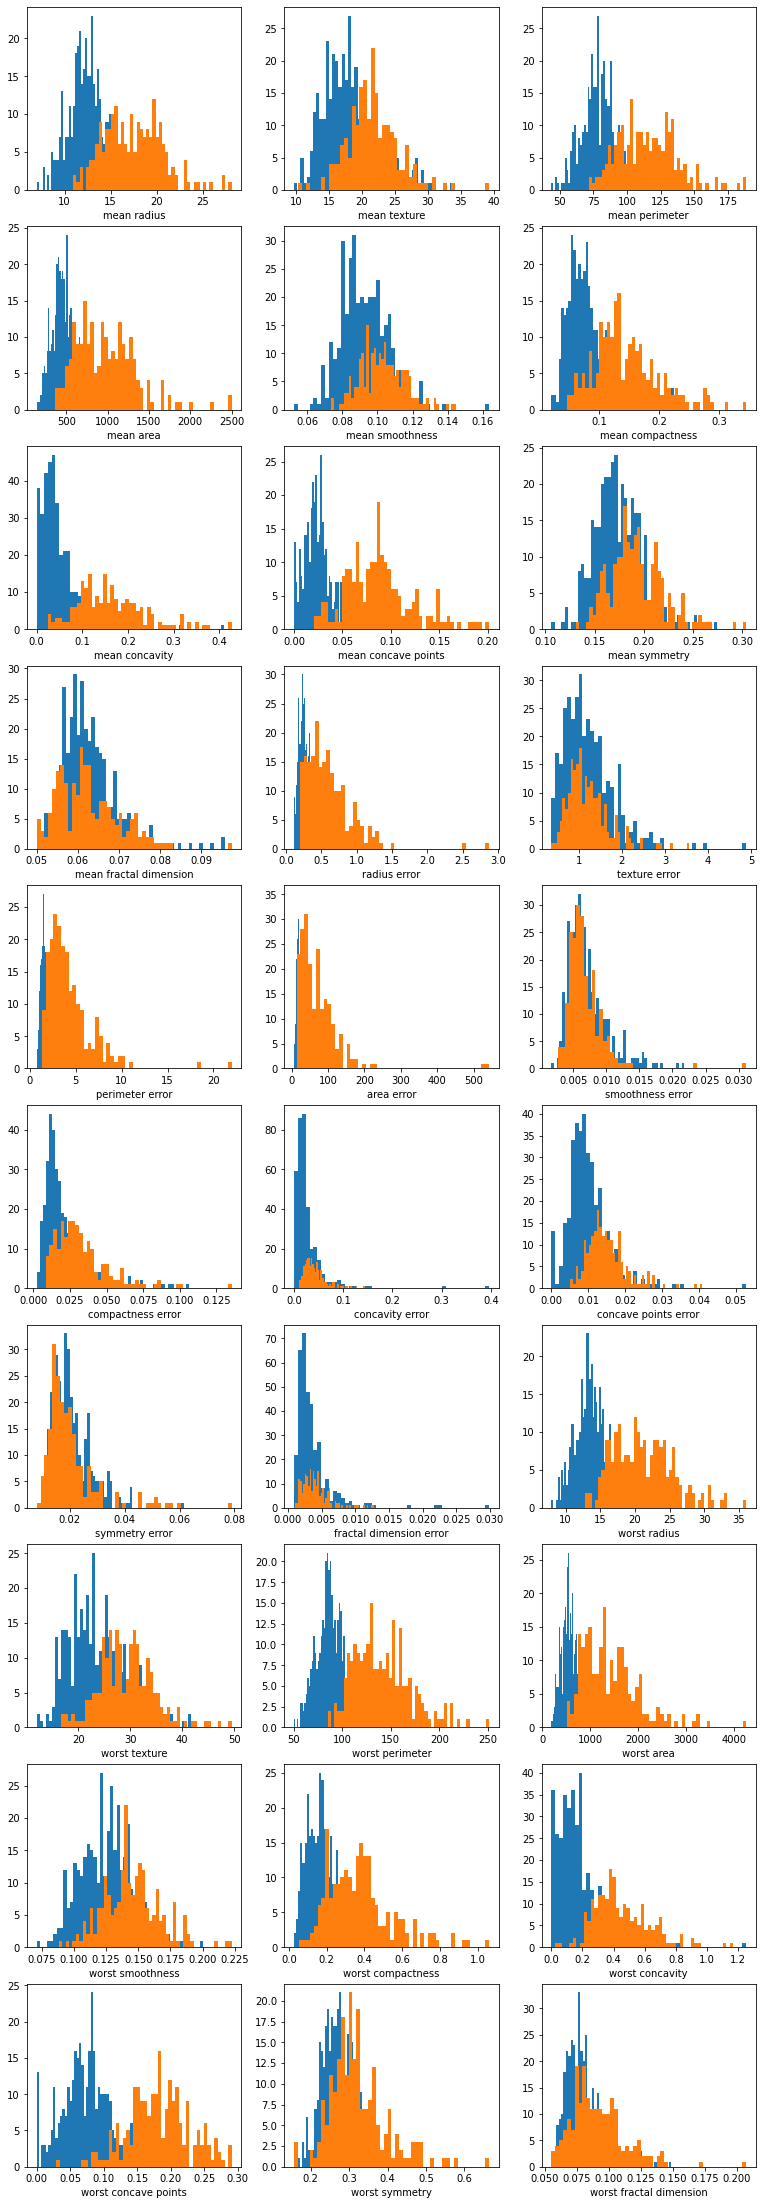

In [0]:
# A different approach to finding good features to use based on chi^2 scores
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
import math

if False:
  chi2_score, chi2_p_value = chi2(X,y)
  for i, n in enumerate(cancer['feature_names']):
    print(n , chi2_score[i])

if True:
  fig, axs = plt.subplots(math.ceil(len(cancer['feature_names'])/3), 3, 
                          figsize=(15,20))
  plt.subplots_adjust(bottom=0.0, right=0.8, top=1.5)

  for ax, f in zip(axs.flatten(), cancer['feature_names']):
    ax.hist(X_benign[f], bins=50)
    ax.hist(X_malignant[f], bins=50)
    #ax.set_title(f)
    ax.set_xlabel(f)
  plt.show()

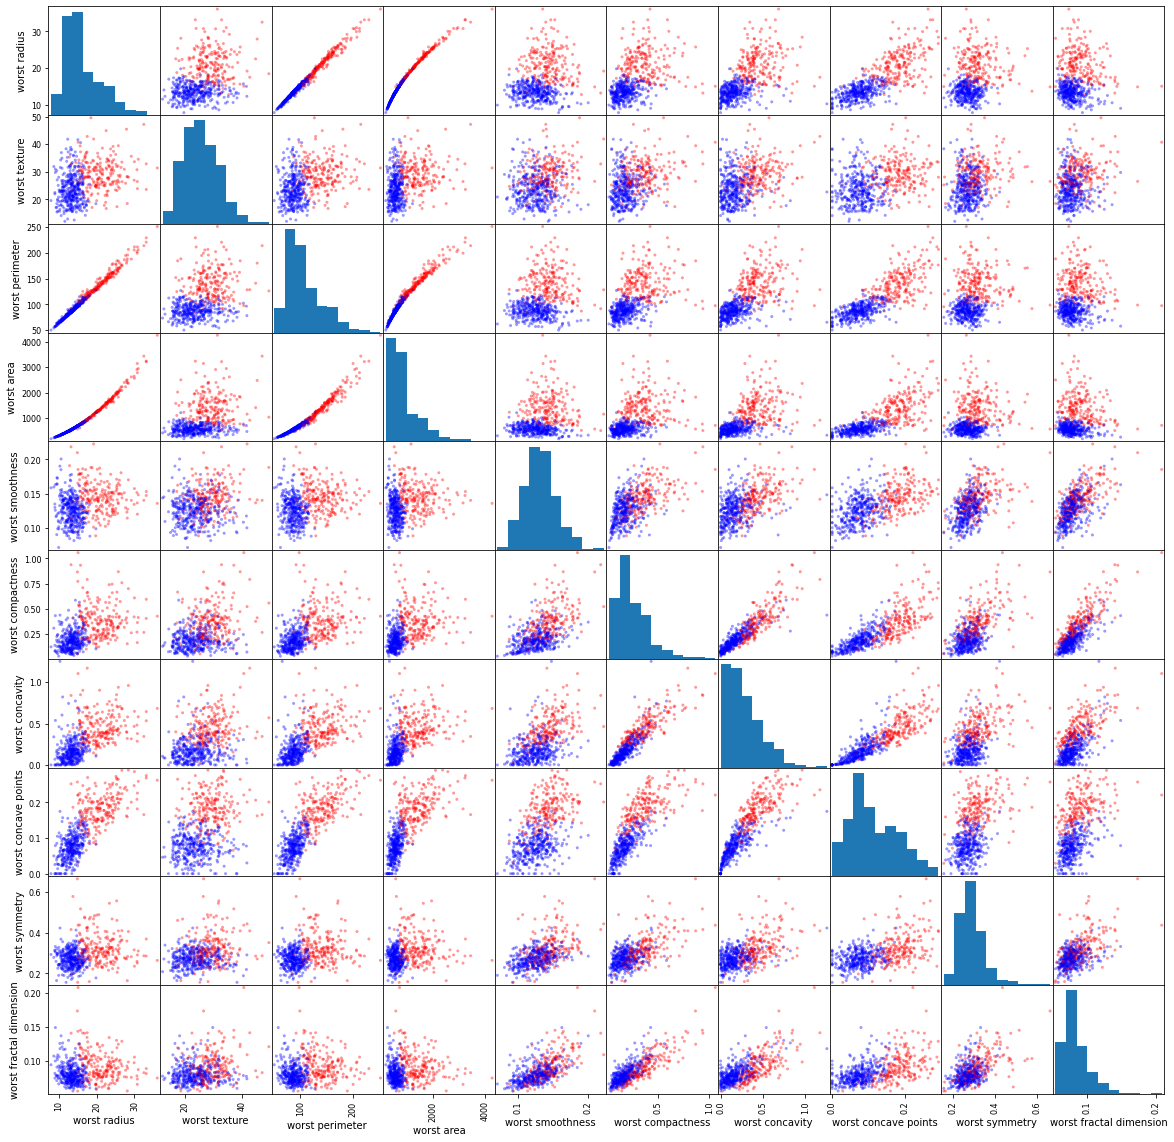

In [0]:
# make scatter plots of features to find good features
# adapted from: https://www.kaggle.com/rcfreitas/python-ml-breast-cancer-diagnostic-data-set

# 'mean' features are in the first 10 columns, error 10:20, worst 20:31
features_mean= list(X.columns[20:31])

# colors = ['red' if yy < 0 else 'blue' for yy in y.values.ravel()]
sm = pd.plotting.scatter_matrix(X[features_mean], c=colors, alpha=0.4, figsize=((20,20)));
plt.show()

NEED TO UPDATE THIS! 
Not surpringly, we see that radius, perimeter, and area are all stronly correlated, so let's choose just area for the first parameter.  Looking across the area row, texture, and then fractial dimension look well-differentated parameters.

In [0]:
selected_features=[
    'worst perimeter', 'worst texture', 
    #'mean area', 'mean smoothness','mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 
    #'mean fractal dimension'
    ]

## Define fine tuning functions

In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import svm
import numpy as np
import time

def fineTuningPoly(X_train, X_test, y_train, y_test, ds, Cs):
  for d in ds:
    for C in Cs:
      clf = svm.SVC(kernel='poly', degree=d, gamma='auto', C=C)
      #clf = svm.SVC(kernel='linear', degree=d, gamma='auto', C=C)
      start_time = time.time()
      model = clf.fit(X_train, y_train.values.ravel())
      time_train = time.time() - start_time

      y_pred = model.predict(X_test)
      print('d:',d, 'C:',round(C,2), round(accuracy_score(y_pred, y_test),5), 
            't:', round(time_train, 4))
      plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
                  c=[colors[i] for i in model.support_],
                  cmap=plt.cm.coolwarm, s=20, edgecolors='k')
      plt.xlabel(X_train.columns[0])
      plt.ylabel(X_train.columns[1])
      plt.show()

def fineTuningRBF(X_train, X_test, y_train, y_test, Cs):
  for C in Cs:
    clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
    start_time = time.time()
    model = clf.fit(X_train, y_train.values.ravel()) 
    time_train = time.time() - start_time

    y_pred = model.predict(X_test)
    print('C:',round(C,2), round(accuracy_score(y_pred, y_test),5), 
          't:', round(time_train, 3))
    plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
                  c=[colors[i] for i in model.support_],
                  cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel(X_train.columns[0])
    plt.ylabel(X_train.columns[1])
    plt.show()

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.8, 
                   random_state=0 # repeatable split
                   )

X_train.shape

(113, 30)

## Grid search for good deg and C for poly and rbf

d: 2 C: 0.2 0.96053 t: 0.0891


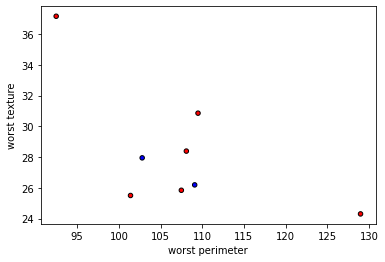

d: 2 C: 0.4 0.9693 t: 0.1518


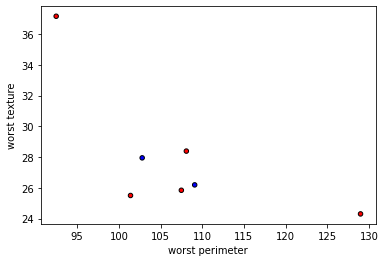

d: 2 C: 0.6 0.96491 t: 0.1421


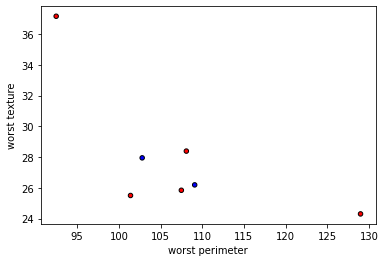

d: 2 C: 0.8 0.94518 t: 0.1102


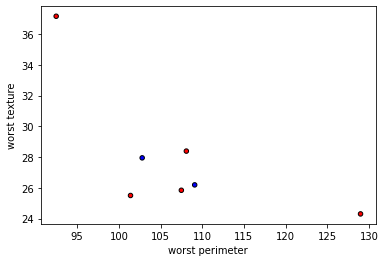

d: 2 C: 1.0 0.94079 t: 0.1192


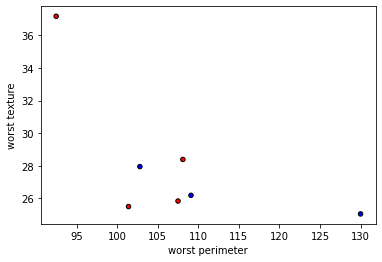

d: 2 C: 1.2 0.94956 t: 0.1981


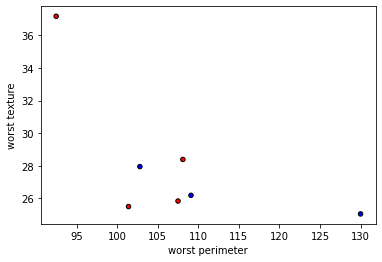

d: 2 C: 1.4 0.95175 t: 0.1881


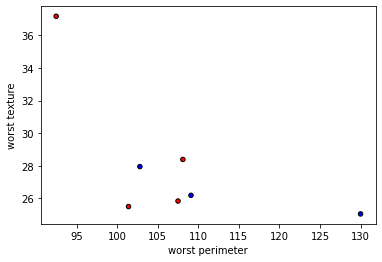

d: 2 C: 1.6 0.95395 t: 0.1776


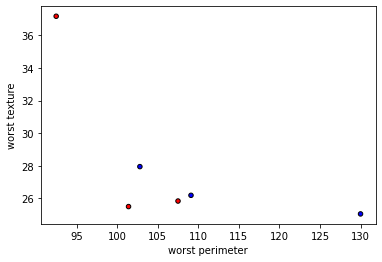

d: 2 C: 1.8 0.95833 t: 0.1995


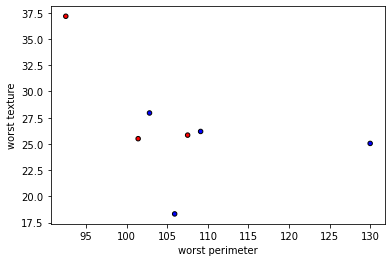

d: 3 C: 0.2 0.96053 t: 0.1521


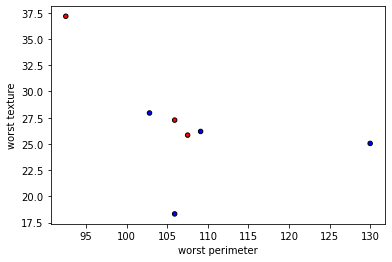

d: 3 C: 0.4 0.96053 t: 0.144


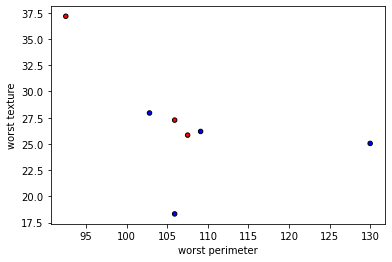

d: 3 C: 0.6 0.96053 t: 0.1478


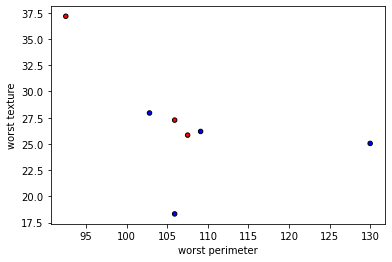

d: 3 C: 0.8 0.96053 t: 0.1524


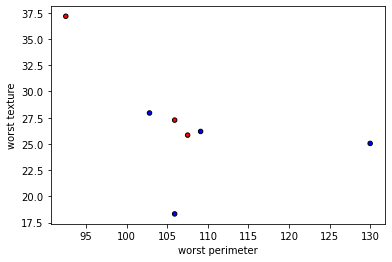

d: 3 C: 1.0 0.96053 t: 0.1533


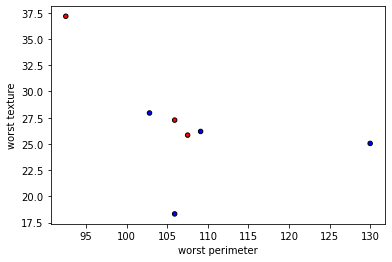

d: 3 C: 1.2 0.96053 t: 0.1455


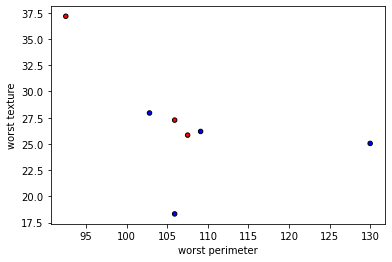

d: 3 C: 1.4 0.96053 t: 0.1505


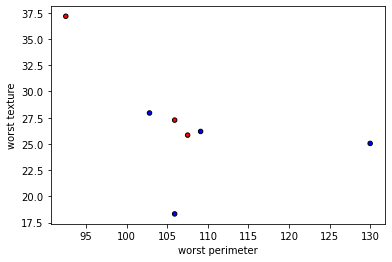

d: 3 C: 1.6 0.96053 t: 0.1463


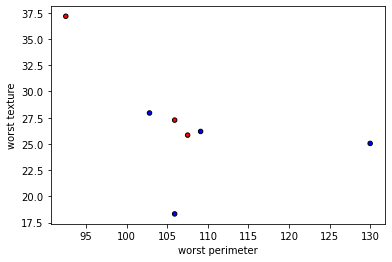

d: 3 C: 1.8 0.96053 t: 0.1495


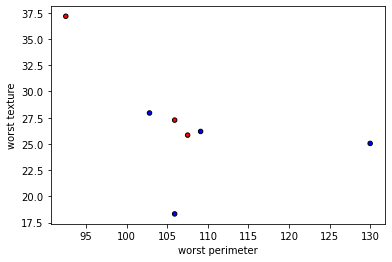

In [0]:
ds = list(range(2,4)) # list(range(2,7)) Google Colab times out for > deg 4
Cs = np.arange(0.2, 2, 0.2).tolist()

fineTuningPoly(X_train[selected_features], X_test[selected_features], 
               y_train, y_test, 
               ds, Cs)

C: 0.2 0.62939 t: 0.003


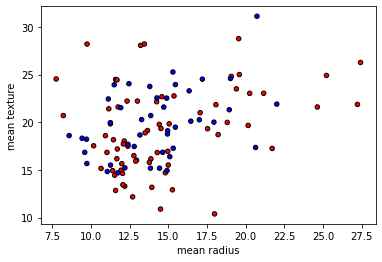

C: 0.4 0.62939 t: 0.003


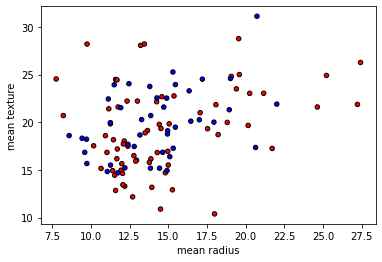

C: 0.6 0.62939 t: 0.004


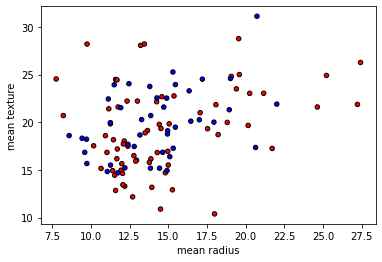

C: 0.8 0.62939 t: 0.004


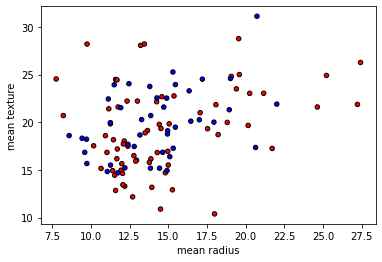

C: 1.0 0.62939 t: 0.003


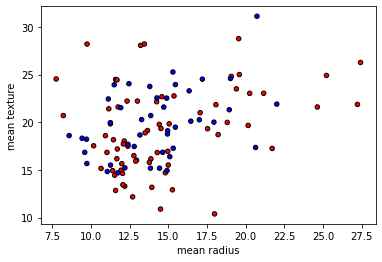

C: 1.2 0.62939 t: 0.004


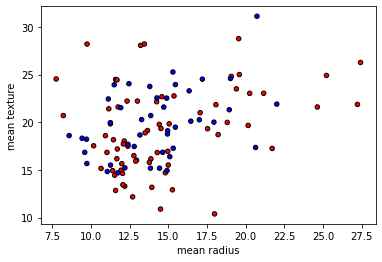

C: 1.4 0.62939 t: 0.003


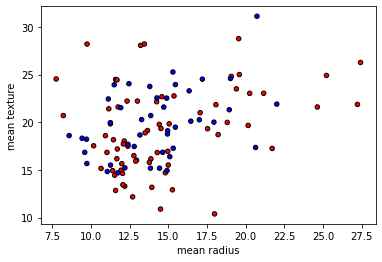

C: 1.6 0.62939 t: 0.004


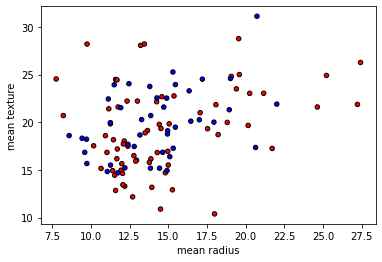

C: 1.8 0.62939 t: 0.003


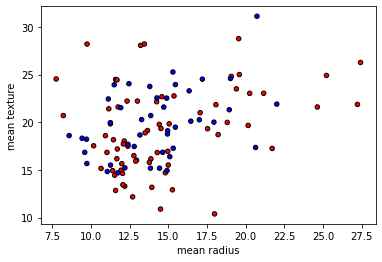

C: 2.0 0.62939 t: 0.003


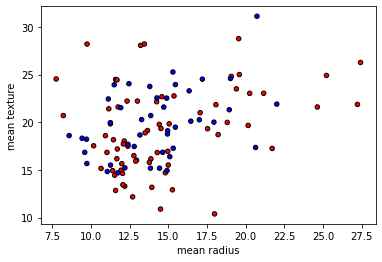

C: 2.2 0.62939 t: 0.004


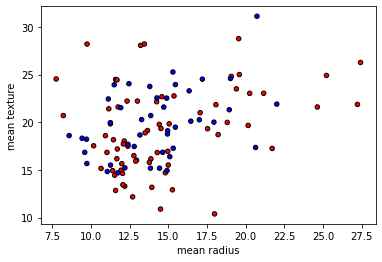

C: 2.4 0.62939 t: 0.003


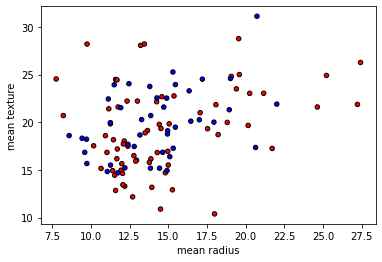

C: 2.6 0.62939 t: 0.003


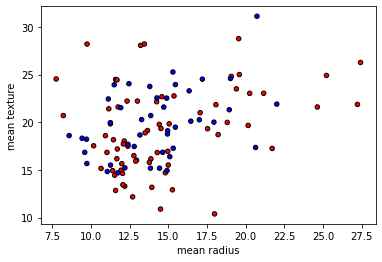

C: 2.8 0.62939 t: 0.003


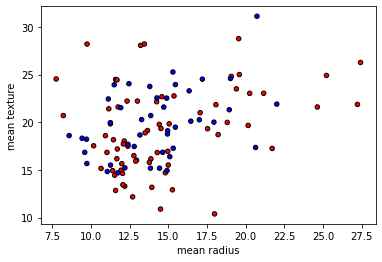

In [0]:
Cs = np.arange(0.2, 3, 0.2).tolist()
fineTuningRBF(X_train, X_test, y_train, y_test, Cs)

In [0]:
# final selections 
selected_kernel = 'poly'  # best score for rbf = 0.59, poly = 0.97 -->poly wins!
selected_degree = 2  # as good as 3 but faster
selected_C = 0.6  # in the middle of a range

## Plot decision boundries and support vectors


In [0]:
import numpy as np

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min()*0.9, x.max()*1.1
    y_min, y_max = y.min()*0.9, y.max()*1.1
    if False:
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
    else:
      xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                           np.linspace(y_min, y_max, 200))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out



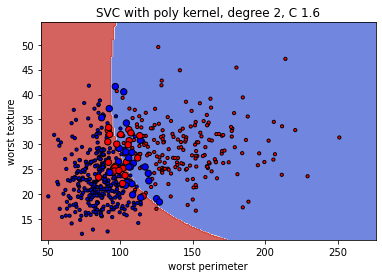

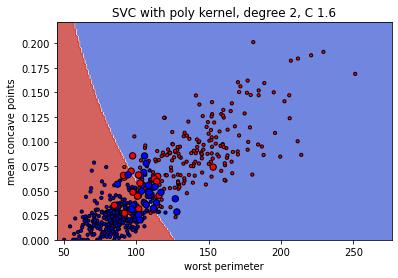

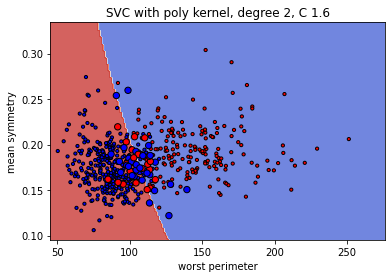

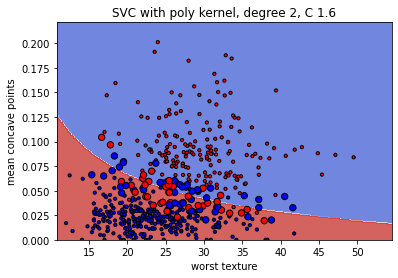

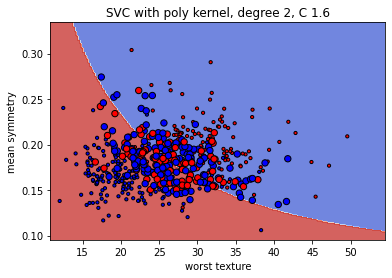

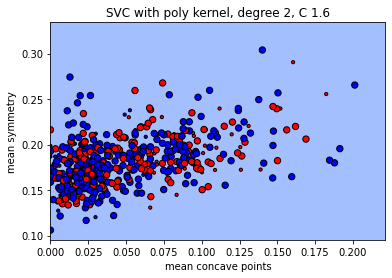

In [0]:
# adapted from https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py

from sklearn import svm
import itertools as iter

degree = 2
kernel = 'poly'
C = 1.6
clf = svm.SVC(kernel=kernel, degree=degree, gamma='auto', C=C, 
              class_weight='balanced')
model = clf.fit(X_train[selected_features], y_train.values.ravel()) 

colors = ['red' if yy < 0 else 'blue' for yy in y.values.ravel()]
for f0, f1 in iter.combinations(selected_features, 2):
  model = clf.fit(X_train[[f0, f1]], y_train.values.ravel()) 

  X0, X1 = X[f0], X[f1]
  xx, yy = make_meshgrid(X0, X1)

  plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  if True: # plot all the data points
    plt.scatter(X0.values.ravel(), X1.values.ravel(), c=colors, 
              cmap=plt.cm.coolwarm, s=10, edgecolors='k')
  if True: # plot the support vectors
    plt.scatter(clf.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                c=[colors[i] for i in model.support_],
                s=40, linewidth=1, facecolors='none', edgecolors='k')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xlabel(f0)
  plt.ylabel(f1)
  plt.title('SVC with %s kernel, degree %d, C %0.1f' % 
            (model.kernel, model.degree, model.C))
  plt.show()

# 5. NN Question:

NN Question:

Use `sklearn` MLP along with grid search to find an optimal prediction accuracy on the African Soil data from chapter 5. What do you think is the effect of having **p > n**, and why might NN be more or less appropriate than SVM or polynomials for this dataset?

## Load dataset

In [1]:
# import drive 
from google.colab import drive
drive.mount('/content/drive')

# data description: https://www.kaggle.com/c/afsis-soil-properties/data
import pandas as pd
my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_5/training.csv'
afrsoil = pd.read_csv(my_path)

afrsoil

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,m7478.68,m7476.75,m7474.82,m7472.89,m7470.97,m7469.04,m7467.11,m7465.18,m7463.25,m7461.32,m7459.39,m7457.47,m7455.54,m7453.61,m7451.68,m7449.75,m7447.82,m7445.89,m7443.97,m7442.04,m7440.11,m7438.18,m7436.25,m7434.32,m7432.4,m7430.47,m7428.54,m7426.61,m7424.68,...,m634.473,m632.544,m630.616,m628.687,m626.759,m624.83,m622.902,m620.973,m619.045,m617.116,m615.188,m613.259,m611.331,m609.402,m607.474,m605.545,m603.617,m601.688,m599.76,BSAN,BSAS,BSAV,CTI,ELEV,EVI,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI,Depth,Ca,P,pH,SOC,Sand
0,XNhoFZW5,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,0.298120,0.298163,0.299124,0.300828,0.302522,0.303633,0.303364,0.302018,0.301226,0.300803,0.299270,0.297354,0.296703,0.297569,0.298991,0.299680,0.299230,0.298567,0.298865,0.299278,0.298186,0.296781,0.296565,0.296190,0.294805,0.293779,0.293980,0.295162,0.297448,0.300198,...,1.91489,1.91967,1.91974,1.91909,1.92077,1.91855,1.90573,1.88994,1.87770,1.86431,1.84816,1.83288,1.81858,1.80247,1.78462,1.76644,1.75086,1.74335,1.74246,-0.630435,-0.700000,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843,Topsoil,-0.295749,-0.041336,-1.129366,0.353258,1.269748
1,9XNspFTd,0.270192,0.268555,0.266964,0.267938,0.271013,0.272346,0.269870,0.266976,0.266544,0.266766,0.266464,0.266817,0.268150,0.269933,0.271409,0.271396,0.270126,0.269351,0.268984,0.267680,0.265901,0.265088,0.265679,0.266744,0.267202,0.266808,0.266266,0.266768,0.267507,0.266740,0.265624,0.265355,0.264461,0.262806,0.262251,0.263087,0.264431,0.266533,0.269126,...,2.00603,2.00192,2.00225,2.00244,1.99688,1.98540,1.96969,1.94942,1.92816,1.91071,1.89728,1.88298,1.86131,1.83355,1.80581,1.78410,1.77195,1.76479,1.75437,-0.630435,-0.700000,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843,Subsoil,-0.387442,-0.231552,-1.531538,-0.264023,1.692209
2,WDId41qG,0.317433,0.316265,0.314948,0.315224,0.316942,0.317764,0.316067,0.313874,0.313301,0.313296,0.313051,0.313306,0.314301,0.315640,0.316764,0.316759,0.315631,0.314860,0.314275,0.312711,0.311094,0.310565,0.311120,0.312103,0.312638,0.312326,0.311623,0.311752,0.312137,0.311122,0.309909,0.309824,0.309471,0.308209,0.307262,0.307201,0.307804,0.309592,0.312165,...,1.79495,1.79606,1.79749,1.79798,1.79977,1.80183,1.80012,1.79366,1.78411,1.77356,1.76544,1.76124,1.75742,1.75113,1.74128,1.72894,1.71991,1.71562,1.71158,-0.753623,-0.836364,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843,Topsoil,-0.248601,-0.224635,-0.259551,0.064152,2.091835
3,JrrJf1mN,0.261116,0.259767,0.258384,0.259001,0.261310,0.262417,0.260534,0.258039,0.257246,0.257124,0.257018,0.257568,0.258724,0.260107,0.261175,0.261028,0.259906,0.259251,0.258669,0.257007,0.255397,0.255119,0.256042,0.257195,0.257301,0.256440,0.256007,0.256729,0.257216,0.256001,0.254599,0.254345,0.253791,0.252452,0.251695,0.252027,0.253043,0.254901,0.257175,...,1.75317,1.76090,1.76944,1.77287,1.77080,1.76396,1.75453,1.74775,1.74264,1.73527,1.72770,1.72349,1.72149,1.71630,1.70737,1.69952,1.69356,1.68812,1.68178,-0.753623,-0.836364,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843,Subsoil,-0.332195,-0.318014,-0.577548,-0.318719,2.118477
4,ZoIitegA,0.260038,0.258425,0.256544,0.257030,0.259602,0.260786,0.258717,0.256352,0.255902,0.255822,0.255720,0.256521,0.257968,0.259571,0.260714,0.260465,0.259352,0.258872,0.258484,0.257105,0.255502,0.254720,0.255194,0.256394,0.257036,0.256583,0.255867,0.256101,0.256414,0.255297,0.254055,0.253889,0.253455,0.252198,0.251296,0.251400,0.252441,0.254763,0.257593,...,1.74973,1.75710,1.76209,1.76110,1.75564,1.75006,1.74568,1.74050,1.73201,1.72088,1.70944,1.69711,1.68257,1.66762,1.65639,1.64929,1.6

In [0]:
# Split... features from Chap 5 lecture notes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
  train_test_split(afrsoil.iloc[:,list(range(1,3594)) + [3497]], 
                   pd.DataFrame(afrsoil.loc[:,'pH']), 
                   test_size=250)

X_train, y_train

(      m7497.96  m7496.04  m7494.11  ...      TMAP      TMFI  m755.968
 773   0.181271  0.176909  0.172701  ...  1.355569  1.559933   1.30844
 748   0.418083  0.414180  0.410099  ...  0.869446  0.246421   1.74583
 699   0.264770  0.259420  0.254530  ...  0.781936  1.414215   1.72823
 631   0.297549  0.293538  0.289568  ...  0.316667  0.207042   1.31501
 1132  0.339866  0.331163  0.323747  ...  1.539208  1.618022   1.69956
 ...        ...       ...       ...  ...       ...       ...       ...
 446   0.248384  0.243086  0.237705  ... -0.132596 -0.347319   1.77606
 292   0.172588  0.167671  0.162250  ...  0.247385  0.089904   1.51112
 808   0.311881  0.305432  0.299124  ...  1.007025  1.877592   1.60359
 502   0.401300  0.395482  0.389741  ...  0.106329 -0.174134   1.91333
 994   0.181435  0.177225  0.174004  ...  1.219715  1.051936   1.34349
 
 [907 rows x 3594 columns],             pH
 773  -0.811369
 748  -0.072494
 699  -0.353080
 631  -0.474667
 1132 -1.026485
 ...        ...
 446   

In [0]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

mlp = MLPRegressor(hidden_layer_sizes=(300,300,300,))
mlp.fit(X_train, y_train.values.ravel())

y_pred = mlp.predict(X_test)
print(mean_absolute_error(y_test.values.ravel(), y_pred))

print(mlp)
#plt.plot(mlp.coefs_[0].ravel())



0.4469756105633498
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(300, 300, 300), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)


Grid Search

In [0]:
from sklearn.model_selection import GridSearchCV
parameter_space = {
    'hidden_layer_sizes': [(300,30,30), (20,20), (20,),], #(10,10,), (30,)],
    #'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    #'learning_rate': ['constant','adaptive'],
    'max_iter': [10, 50, 100, 300]
}
mlp_gs = MLPRegressor()
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=7)


In [0]:
import time
start_time = time.time()
clf.fit(X_train, y_train.values.ravel())
print('time:', round(time.time()-start_time, 1), 'seconds')

print("Best parameters set found on development set:\n",
      clf.best_params_)
print()
print(clf.best_params_)
print()
print("Grid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()


print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_pred = clf.predict(X_test)

print()
mean_absolute_error(y_test, y_pred)

time: 837.8 seconds
Best parameters set found on development set:
 {'hidden_layer_sizes': (300, 30, 30), 'max_iter': 100, 'solver': 'sgd'}

{'hidden_layer_sizes': (300, 30, 30), 'max_iter': 100, 'solver': 'sgd'}

Grid scores on development set:

0.324 (+/-0.194) for {'hidden_layer_sizes': (300, 30, 30), 'max_iter': 10, 'solver': 'sgd'}
0.162 (+/-0.159) for {'hidden_layer_sizes': (300, 30, 30), 'max_iter': 10, 'solver': 'adam'}
0.611 (+/-0.159) for {'hidden_layer_sizes': (300, 30, 30), 'max_iter': 50, 'solver': 'sgd'}
0.598 (+/-0.209) for {'hidden_layer_sizes': (300, 30, 30), 'max_iter': 50, 'solver': 'adam'}
0.671 (+/-0.097) for {'hidden_layer_sizes': (300, 30, 30), 'max_iter': 100, 'solver': 'sgd'}
0.568 (+/-0.193) for {'hidden_layer_sizes': (300, 30, 30), 'max_iter': 100, 'solver': 'adam'}
0.666 (+/-0.092) for {'hidden_layer_sizes': (300, 30, 30), 'max_iter': 300, 'solver': 'sgd'}
0.586 (+/-0.129) for {'hidden_layer_sizes': (300, 30, 30), 'max_iter': 300, 'solver': 'adam'}
0.210 (+/-

0.37703670400399875

# 6. 

(Extra Credit) CNN Question:

Design a CNN in **Keras** with 3 convolutional layers to predict the fashion prodcut class from **Fashion-MNIST** (as loaded below). Use the `history` object of the return to Keras's `.fit()` function to plot and analyze the training `[acc]` and validation accuracy `[val_acc]` for each of the 15 epochs. Use 20/80 train/validation split. Hint: You can add the validation data as `validation_data` in the `.fit()` function.

In [0]:
from keras.datasets import fashion_mnist